In [1]:
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

from mplsoccer import VerticalPitch, FontManager
from mplsoccer.statsbomb import read_event, EVENT_SLUG

In [20]:
df=pd.read_csv(r'C:\Users\Home\Documents\check.csv')

# filter chelsea pressure events
Team_Name='Marko Bulat'

mask_chelsea_pressure = (df.player == Team_Name) & (df.type == 'Pass')
df = df.loc[mask_chelsea_pressure, ['Start_x', 'Start_y']]

In [21]:
print(len(df))

53


# Plot positional heatmap

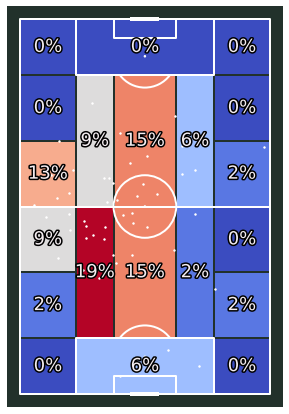

In [22]:
# see the custom colormaps example for more ideas on setting colormaps
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

# fontmanager for google font (robotto)
robotto_regular = FontManager()

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

# setup pitch
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2,
                      pitch_color='#22312b', line_color='white')
# draw
fig, ax = pitch.draw(figsize=(4.125, 6))
bin_statistic = pitch.bin_statistic_positional(df.Start_x, df.Start_y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=ax, cmap='coolwarm', edgecolors='#22312b')
pitch.scatter(df.Start_x, df.Start_y, c='white', s=2, ax=ax)
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

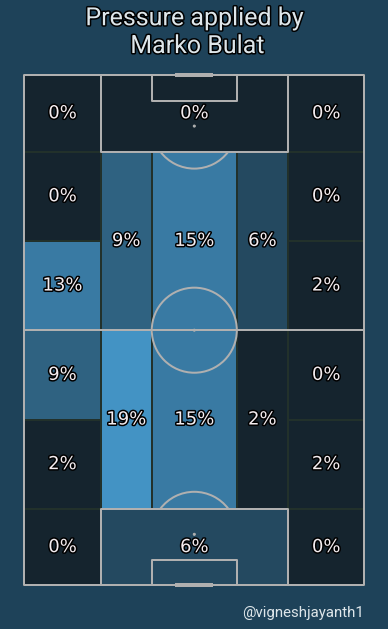

In [23]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#1e4259')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor('#1e4259')

# heatmap and labels
bin_statistic = pitch.bin_statistic_positional(df.Start_x, df.Start_y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=pearl_earring_cmap, edgecolors='#22312b')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

# endnote and title
axs['endnote'].text(1, 0.5, '@vigneshjayanth1', va='center', ha='right', fontsize=15,
                    fontproperties=robotto_regular.prop, color='#dee6ea')
axs['title'].text(0.5, 0.5, "Pressure applied by\n "+ str(Team_Name), color='#dee6ea',
                  va='center', ha='center', path_effects=path_eff,
                  fontproperties=robotto_regular.prop, fontsize=25)
# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_heatmap_positional_002.png'

plt.show()  # If you are using a Jupyter notebook you do not need this line